In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
import copy, math

# Problem Statement
Size (sqft)	Number of Bedrooms	Number of floors	Age of Home	Price (1000s dollars)
2104	5	1	45	460
1416	3	2	40	232
852	    2   1	35	178


Creating arrays for X_train and Y_train

In [7]:
X_train = np.array([
    [2104, 5, 1, 45],
    [1416, 3, 2, 40],
    [852 , 2, 1, 35]
    ],
    dtype= np.dtype(float)
)

Y_train = np.array([460, 232, 178], dtype=np.dtype(float))

Printing shape and matrices

In [8]:
print(f"Shape of X_train : {np.shape(X_train)}")
print("X_train : \n", X_train)
print(f"Shape of Y_train : {np.shape(Y_train)}")
print("Y_train : \n" , Y_train)

Shape of X_train : (3, 4)
X_train : 
 [[2.104e+03 5.000e+00 1.000e+00 4.500e+01]
 [1.416e+03 3.000e+00 2.000e+00 4.000e+01]
 [8.520e+02 2.000e+00 1.000e+00 3.500e+01]]
Shape of Y_train : (3,)
Y_train : 
 [460. 232. 178.]


Parameter vector w, b

In [9]:
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])

print(f"The type of b_init : {type(b_init)}")
print(f"The type of w_init : {type(w_init)}")
print(f"The shape of w_init : {np.shape(w_init)}")

The type of b_init : <class 'float'>
The type of w_init : <class 'numpy.ndarray'>
The shape of w_init : (4,)


In [10]:
print(X_train.shape[0]) # gives no. of elements of X_train


3


Function:
    single predict using linear regression    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      

In [11]:
def predicted_single_loop(x , w, b):

    # no. of samples:
    no_of_training_examples = x.shape[0]

    #prediction:
    y_hat = 0

    for example in range(no_of_training_examples):
        # y = wx + b
        i_prediction = w[example] * x[example]
        y_hat = y_hat + i_prediction
    # After iterating all training examples and multiplied them with w, add bias
    y_hat = y_hat + b
    return y_hat


# get a row from our training data

X_train[0, :2] 
here :
0 indicates the first element of X_train, it means row 1.
,
: indicatess the column of that first element. here : indicates all the columns.

e.g:

[0, :2] : first row, first 2 columns of that row
[0, :] : first row , all columns of that row.

In [12]:
X_example = X_train[0, :]
print(f"First training example is : {X_example}, and its shape is : {X_example.shape}")

First training example is : [2.104e+03 5.000e+00 1.000e+00 4.500e+01], and its shape is : (4,)


# make a prediction
Now we have x , w, b

x = X_example
w = w_init
b = b_init

So, now we will use them, and make prediction

In [13]:
f_wb = predicted_single_loop(X_example, w_init, b_init)
print(f"The price of house with {X_example[0] } sqft size, {X_example[1]} bedrooms, {X_example[2]} floors and with age of {X_example[3]} is: {f_wb}.")

The price of house with 2104.0 sqft size, 5.0 bedrooms, 1.0 floors and with age of 45.0 is: 459.9999976194083.


# Compute Cost With Multiple Variables

The equation for the cost function with multiple variables  𝐽(𝐰,𝑏)
  is:
𝐽(𝐰,𝑏)=1/2𝑚 ∑𝑖=0 𝑚−1 (𝑓𝐰,𝑏(𝐱(𝑖))−𝑦(𝑖))2

In [14]:
def compute_cost(x,y,w,b):
    m = x.shape[0] # m is total no. of samples
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(x[i],w) + b # as we know, f w,b(x) = wx + b. so, we are first calculating this f_wb for each element m.
        # once f w,b (x) is calculated, 
        # next
        # put it in j(w, b) = 1/2m  ∑𝑖=0 𝑚−1  (f w,b(x) - y)^2
        # f w,b(x) replce it with f_wb_i
        # 
        cost = cost + (f_wb_i - y[i])**2 

    # so , now ∑𝑖=0 𝑚−1  (f w,b(x) - y)^2 is calculated , once its done, we have to multiply the cost by 1/2m
    cost = cost / (2*m)
    return cost


In [15]:
cost_cal = compute_cost(X_train, Y_train, w_init, b_init)
print(f"The optimal w cost : {cost_cal}")

The optimal w cost : 1.5578904428966628e-12


# no. of sample , and  no. of feature in each sample

In [16]:
m,n = X_train.shape 

""" it directly unpack the tuple into m and n. let say we have shape of X_train (3, 4), it unpack it, give 3
to m and 4 to n.  gives no. of sample , and  no. of feature in each sample"""

print(m)
print(n)

# Alternative to get this:
m = X_train.shape[0]
n = X_train.shape[1]


3
4


Compute Gradient with Multiple Variables

In [17]:
def compute_gradient(x,y,w,b):
    m,n = X_train.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for row in range(m):
        err = (np.dot(x[row] , w) + b) - y[row]
        for feature in range(n):
            temp = err * x[row, feature]
            dj_dw[feature] = dj_dw[feature] + temp
        dj_db = dj_db + err
        dj_db = dj_db / m
        dj_dw = dj_dw / m

    return  dj_db , dj_dw


In [18]:
tmp_dj_db , tmp_dj_dw = compute_gradient(X_train, Y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -6.062108931709426e-07
dj_dw at initial w,b: 
 [-7.29064358e-04 -1.65810885e-06 -7.87387771e-07 -2.30049663e-05]


Gradient Descent With Multiple Variables

In [25]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [27]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, Y_train, w_init, b_init,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {Y_train[i]}")

Iteration    0: Cost     0.00   
Iteration  100: Cost     0.00   
Iteration  200: Cost     0.00   
Iteration  300: Cost     0.00   
Iteration  400: Cost     0.00   
Iteration  500: Cost     0.00   
Iteration  600: Cost     0.00   
Iteration  700: Cost     0.00   
Iteration  800: Cost     0.00   
Iteration  900: Cost     0.00   
b,w found by gradient descent: 785.18,[  0.39133535  18.75376741 -53.36032453 -26.42131618] 
prediction: 460.00, target value: 460.0
prediction: 232.00, target value: 232.0
prediction: 178.00, target value: 178.0


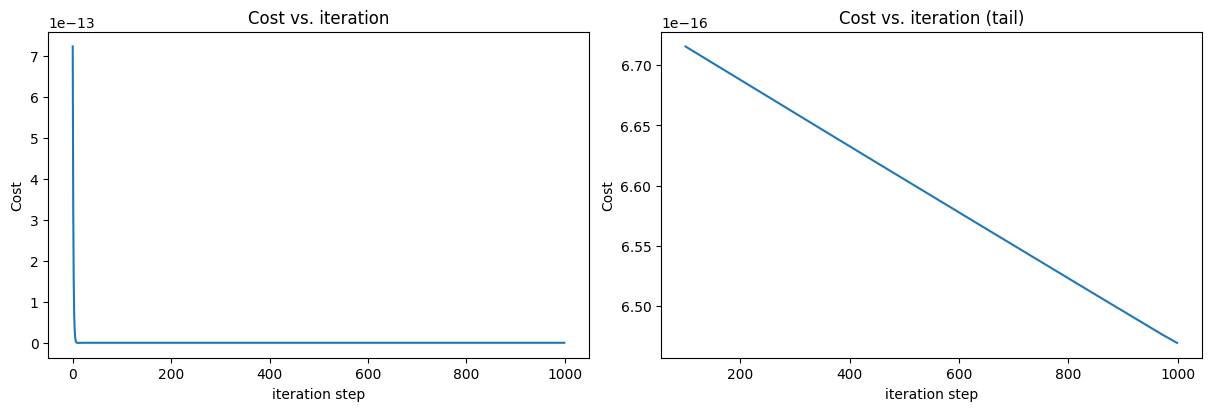

In [28]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()